In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_total_all = pd.read_csv('Institut Teknologi Telkom Surabaya.csv')
print(df_total_all)

                          nama  \
0                  kalyca raya   
1                     Dwi Yuan   
2                 Adi Prasetyo   
3         mutmainnah salaminna   
4    A.R. Bagas Danang Haditio   
..                         ...   
427                 Jufri Yadi   
428              Nurul Adhiyah   
429            Intan Anggreita   
430           Hawwin Mardhiana   
431            ꁴꍟꍏ ꃴꍟꁴꀘꍏ ꈤꍏꀎꋪꍏ   

                                                review  bintang  
0    Pelayanan nya sangat bagusMembantu sekali saat...        5  
1    Penggemar bakso hayo coba rasa bakso saya di K...        5  
2    Salah satu kampus it telkom di daerah strategi...        5  
3    Murid saya ada yg kuliah disini... Baru aja lu...        5  
4    Kangen suasana shalt ied di lapangan Telkom td...        5  
..                                                 ...      ...  
427                               Tempat yang bagus!!!        5  
428                                      Good place!!!        5

In [2]:
df_total_all_new = df_total_all.dropna(ignore_index=True)
print(df_total_all_new)

                          nama  \
0                  kalyca raya   
1                     Dwi Yuan   
2                 Adi Prasetyo   
3         mutmainnah salaminna   
4    A.R. Bagas Danang Haditio   
..                         ...   
229              Sapruarua Rua   
230                 Jufri Yadi   
231              Nurul Adhiyah   
232            Intan Anggreita   
233           Hawwin Mardhiana   

                                                review  bintang  
0    Pelayanan nya sangat bagusMembantu sekali saat...        5  
1    Penggemar bakso hayo coba rasa bakso saya di K...        5  
2    Salah satu kampus it telkom di daerah strategi...        5  
3    Murid saya ada yg kuliah disini... Baru aja lu...        5  
4    Kangen suasana shalt ied di lapangan Telkom td...        5  
..                                                 ...      ...  
229                                               Hehe        5  
230                               Tempat yang bagus!!!        5

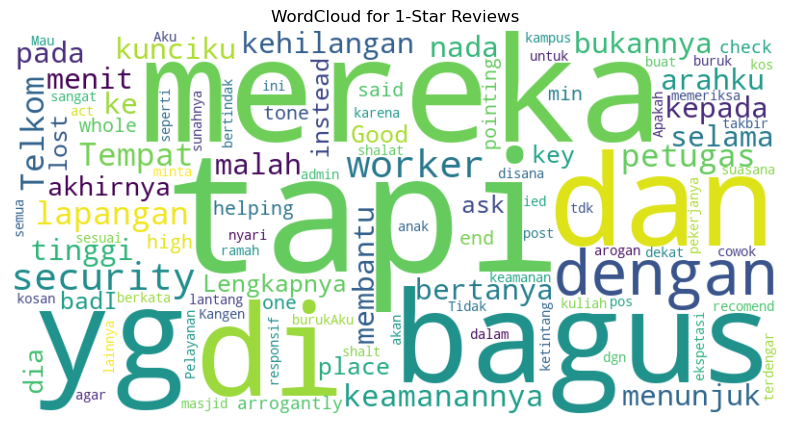

No reviews for 2-star rating.
No reviews for 3-star rating.


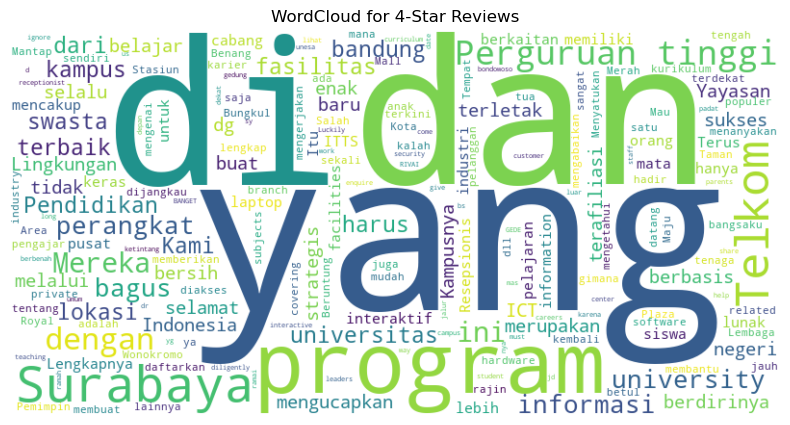

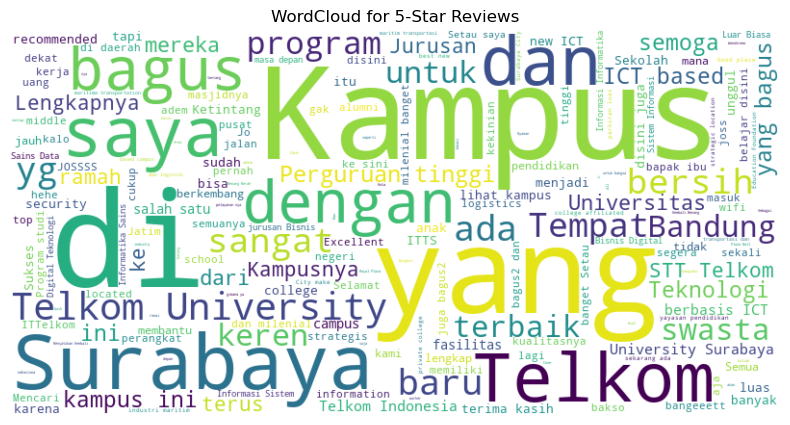

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


for bintang in range(1, 6):
    # Filter DataFrame untuk review dengan bintang tertentu
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Gabungkan semua teks dalam satu string
    text = " ".join(review for review in filtered_df.review)
    
    if text:  # Check if there are any reviews for the current star rating
        # Buat wordcloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Tampilkan wordcloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews')
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")

In [4]:
from deep_translator import GoogleTranslator
from tqdm import tqdm
import pandas as pd

translator = GoogleTranslator(source='en', target='id')

def terjemahkan(teks):
    try:
        return translator.translate(teks)
    except Exception as e:
        return str(e)

tqdm.pandas()
df_total_all_new['review'] = df_total_all_new['review'].progress_apply(terjemahkan)

df = df_total_all_new[~df_total_all_new['review'].str.contains("exception", case=False, na=False)]
df = df_total_all_new[~df_total_all_new['review'].str.contains("attribute", case=False, na=False)]

# Tampilkan DataFrame setelah terjemahan
print(df_total_all_new)


100%|██████████| 234/234 [02:02<00:00,  1.91it/s]

                          nama  \
0                  kalyca raya   
1                     Dwi Yuan   
2                 Adi Prasetyo   
3         mutmainnah salaminna   
4    A.R. Bagas Danang Haditio   
..                         ...   
229              Sapruarua Rua   
230                 Jufri Yadi   
231              Nurul Adhiyah   
232            Intan Anggreita   
233           Hawwin Mardhiana   

                                                review  bintang  
0    Pelayanannya sangat bagusMembantu sekali saat ...        5  
1    Penggemar bakso hayo coba rasa bakso saya di K...        5  
2    Salah satu kampus it telkom di daerah strategi...        5  
3    Murid saya ada yg kuliah disini... Baru aja lu...        5  
4    Kangen suasana harus ied di lapangan Telkom td...        5  
..                                                 ...      ...  
229                                               Hehe        5  
230                               Tempat yang bagus!!!        5


C:\Users\HAFIZ\AppData\Local\Temp\ipykernel_43640\1466462576.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_all_new['review'] = df_total_all_new['review'].progress_apply(terjemahkan)


In [5]:
# Langkah 1: Bersihkan semua string dan ubah ke huruf kecil
df_total_all_new = df_total_all_new.progress_applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Langkah 2: Buat fungsi untuk menghapus tanda baca
def hapus_tanda_baca(teks):
    if not isinstance(teks, str):
        # Return teks as-is if it's not a string
        return teks
    tanda_baca = ".,!?():"
    for char in tanda_baca:
        teks = teks.replace(char, "")
    return teks

# Langkah 3: Aplikasikan fungsi pada kolom yang diinginkan
df_total_all_new['review'] = df_total_all_new['review'].progress_apply(hapus_tanda_baca)

# Langkah 4: Buat fungsi untuk menghitung jumlah kata
def hitung_jumlah_kata(teks):
    if isinstance(teks, str):
        return len(teks.split())
    return 0  # Return 0 for non-string values

# Terapkan jika diperlukan
df_total_all_new['word_count'] = df_total_all_new['review'].progress_apply(hitung_jumlah_kata)

# Tampilkan DataFrame setelah penghapusan tanda baca dan hitung jumlah kata
print(df_total_all_new.head())


  0%|          | 0/702 [00:00<?, ?it/s]C:\Users\HAFIZ\anaconda3\Lib\site-packages\tqdm\std.py:805: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return getattr(df, df_function)(wrapper, **kwargs)
100%|██████████| 234/234 [00:00<00:00, 233849.69it/s]

                        nama  \
0                kalyca raya   
1                   dwi yuan   
2               adi prasetyo   
3       mutmainnah salaminna   
4  a.r. bagas danang haditio   

                                              review  bintang  word_count  
0  pelayanannya sangat bagusmembantu sekali saat ...        5          12  
1  penggemar bakso hayo coba rasa bakso saya di k...        5          11  
2  salah satu kampus it telkom di daerah strategi...        5          34  
3  murid saya ada yg kuliah disini baru aja lulus...        5          18  
4  kangen suasana harus ied di lapangan telkom td...        5          23  


In [6]:
import nltk
from nltk.tokenize import word_tokenize
import string

# Unduh data tokenizer jika belum ada
nltk.download('punkt')


# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Terapkan tokenisasi pada kolom 'text'
df_total_all_new['tokens'] = df_total_all_new['review'].astype(str).apply(tokenize_text)

print(df_total_all_new)

                          nama  \
0                  kalyca raya   
1                     dwi yuan   
2                 adi prasetyo   
3         mutmainnah salaminna   
4    a.r. bagas danang haditio   
..                         ...   
229              sapruarua rua   
230                 jufri yadi   
231              nurul adhiyah   
232            intan anggreita   
233           hawwin mardhiana   

                                                review  bintang  word_count  \
0    pelayanannya sangat bagusmembantu sekali saat ...        5          12   
1    penggemar bakso hayo coba rasa bakso saya di k...        5          11   
2    salah satu kampus it telkom di daerah strategi...        5          34   
3    murid saya ada yg kuliah disini baru aja lulus...        5          18   
4    kangen suasana harus ied di lapangan telkom td...        5          23   
..                                                 ...      ...         ...   
229                                   

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HAFIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]
df_total_all_new['tokens'] = df_total_all_new['tokens'].progress_apply(remove_stopwords)

# Tampilkan DataFrame setelah penghapusan stopwords
print(df_total_all_new)

100%|██████████| 234/234 [00:00<00:00, 116122.47it/s]

                          nama  \
0                  kalyca raya   
1                     dwi yuan   
2                 adi prasetyo   
3         mutmainnah salaminna   
4    a.r. bagas danang haditio   
..                         ...   
229              sapruarua rua   
230                 jufri yadi   
231              nurul adhiyah   
232            intan anggreita   
233           hawwin mardhiana   

                                                review  bintang  word_count  \
0    pelayanannya sangat bagusmembantu sekali saat ...        5          12   
1    penggemar bakso hayo coba rasa bakso saya di k...        5          11   
2    salah satu kampus it telkom di daerah strategi...        5          34   
3    murid saya ada yg kuliah disini baru aja lulus...        5          18   
4    kangen suasana harus ied di lapangan telkom td...        5          23   
..                                                 ...      ...         ...   
229                                   

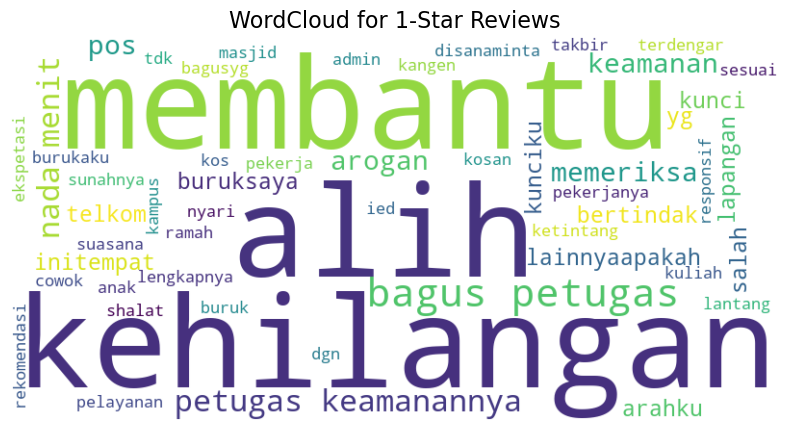

No reviews for 2-star rating.
No reviews for 3-star rating.


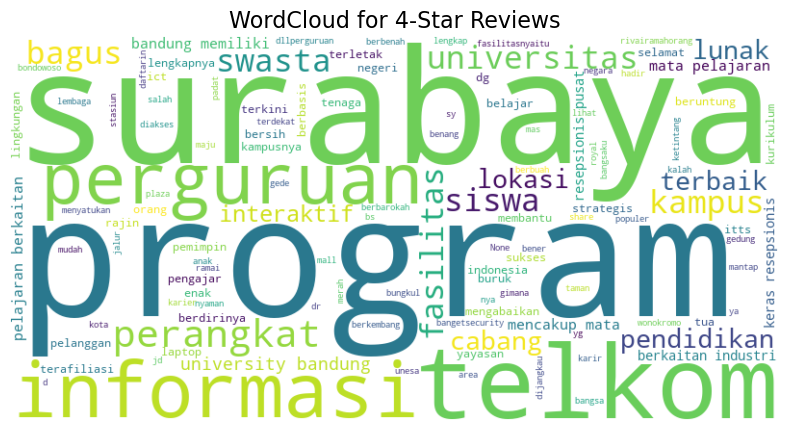

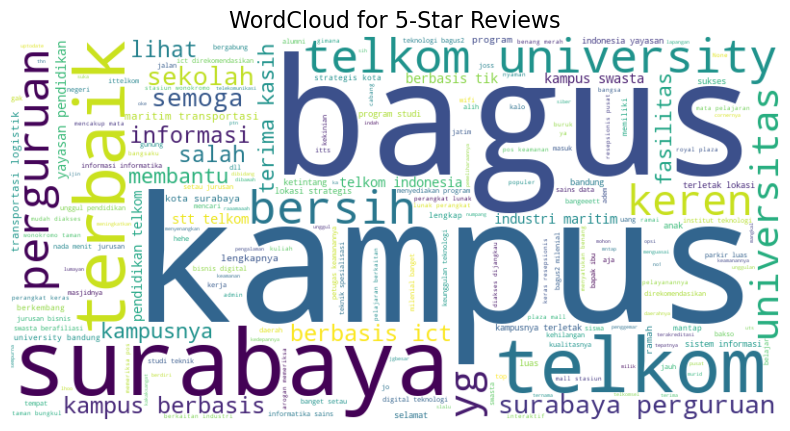

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for bintang in range(1, 6):
    # Filter DataFrame for specific star rating
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Combine all tokenized words into a single string
    text = " ".join(" ".join(tokens) for tokens in filtered_df['tokens'] if isinstance(tokens, list))
    
    if text:  # Check if there are any tokens for the current star rating
        # Generate the WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Display the WordCloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews', fontsize=16)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")


In [9]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Fungsi untuk melakukan stemming menggunakan Sastrawi
factory = StemmerFactory()
stemmer_id = factory.create_stemmer()
def apply_stemming(tokens):
    return [stemmer_id.stem(token) for token in tokens]

# Terapkan fungsi stemming pada kolom 'tokens'
df_total_all_new['stemmed_tokens'] = df_total_all_new['tokens'].progress_apply(apply_stemming)

print(df_total_all_new)

100%|██████████| 234/234 [00:24<00:00,  9.53it/s]

                          nama  \
0                  kalyca raya   
1                     dwi yuan   
2                 adi prasetyo   
3         mutmainnah salaminna   
4    a.r. bagas danang haditio   
..                         ...   
229              sapruarua rua   
230                 jufri yadi   
231              nurul adhiyah   
232            intan anggreita   
233           hawwin mardhiana   

                                                review  bintang  word_count  \
0    pelayanannya sangat bagusmembantu sekali saat ...        5          12   
1    penggemar bakso hayo coba rasa bakso saya di k...        5          11   
2    salah satu kampus it telkom di daerah strategi...        5          34   
3    murid saya ada yg kuliah disini baru aja lulus...        5          18   
4    kangen suasana harus ied di lapangan telkom td...        5          23   
..                                                 ...      ...         ...   
229                                   

In [10]:
import pandas as pd
import re


# Fungsi untuk menghapus angka
def remove_numbers(token_list):
    return [token for token in token_list if not re.search(r'\d', token)]  # Hapus token yang mengandung angka

# Terapkan fungsi ke setiap baris
df_total_all_new['stemmed_tokens2'] = df_total_all_new['stemmed_tokens'].apply(remove_numbers)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens2']:
    print(','.join(tokens))


layan,bagusmembantu,daftar,online,ajar
gemar,bakso,hayo,coba,bakso,ketintang,telkom
salah,kampus,it,telkom,daerah,strategis,surabaya,tepat,daerah,ketintang,program,studi,lumayan,lengkap,fasilitas,pada,halaman,luas,bersih,rekomendasi,ajar
murid,yg,kuliah,aja,lulus,oktober,alhamdulillah,moga,abdi,masyarakat
kangen,suasana,ied,lapang,telkom,tdk,masjid,telkom,ketintang,sunah,shalat,lapang,takbir,dengar,dgn,lantang
sempurna,layan,moga,gabung,uts
kampus,adem,moga,telkom,university,tingkat,kualitas,jurus,akreditasi,unggul,btw,bangun,bekas,atm,bongkar,wajah,keren,kampus,telkom,university,
salah,opsi,baik,studi,bidang,it,bawa,naung,bumn,baik,negeri,depan,salah,guru,nama,jatim,indonesia
nyari,kos,anak,yg,kuliah,disanaminta,rekomendasi,kosan,cowok,yg,bagusyg,kampus
layan,admin,ramah,responsif,
kunjung,ken,jalan,jalan,aja,lihat,kampus,aman,raaamaaah
terima,kasih,pelihara,sukses,slalu,universitas,telkom,surabaya
kampus,bersih,wifi,cornernya
cabang,telkom,university,bandung,milik,program,cakup,mata,

In [11]:
# Menghitung token kosong setelah stemming
def count_empty_tokens(df):
    # Hitung jumlah token kosong dalam setiap baris dan jumlah totalnya
    df['empty_token_count'] = df['stemmed_tokens'].apply(lambda tokens: sum(1 for token in tokens if not token.strip()))
    total_empty_tokens = df['empty_token_count'].sum()
    print(f"Total Token Kosong: {total_empty_tokens}")
    return total_empty_tokens

# Panggil fungsi untuk menghitung token kosong
count_empty_tokens(df_total_all_new)


Total Token Kosong: 24


24

In [12]:
# Bersihkan token kosong langsung dari kolom 'stemmed_tokens'
df_total_all_new['stemmed_tokens'] = df_total_all_new['stemmed_tokens'].apply(
    lambda tokens: [token for token in tokens if token.strip()]
)

# Konfirmasi token kosong sudah dihapus
count_empty_tokens(df_total_all_new)


Total Token Kosong: 0


0

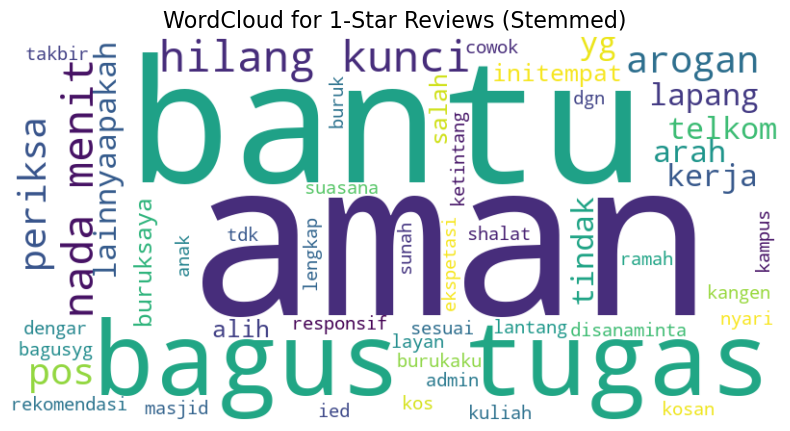

No reviews for 2-star rating.
No reviews for 3-star rating.


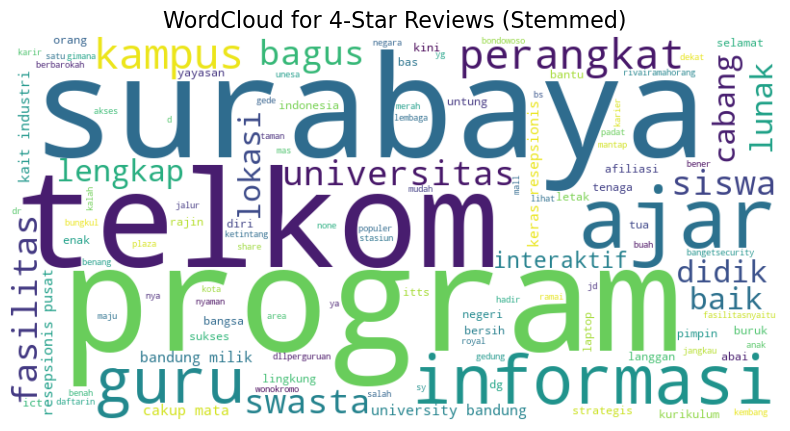

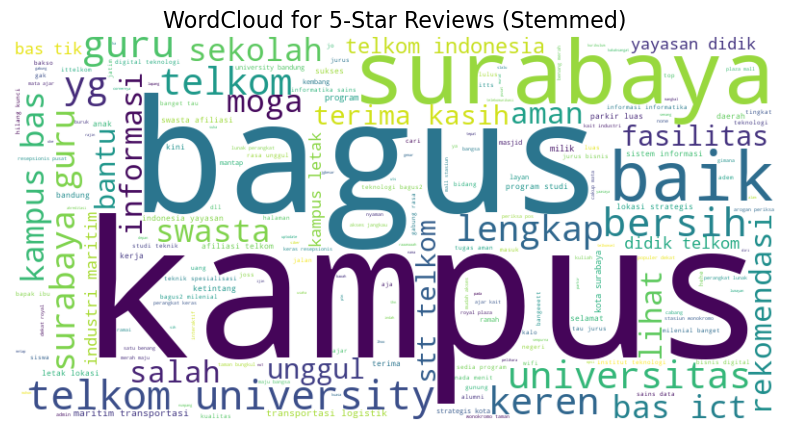

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for bintang in range(1, 6):
    # Filter DataFrame for specific star rating
    filtered_df = df_total_all_new[df_total_all_new['bintang'] == bintang]
    
    # Combine all stemmed tokens into a single string
    text = " ".join(" ".join(tokens) for tokens in filtered_df['stemmed_tokens'] if isinstance(tokens, list))
    
    if text:  # Check if there are any tokens for the current star rating
        # Generate the WordCloud
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
        
        # Display the WordCloud
        plt.figure(figsize=(10, 5))
        plt.title(f'WordCloud for {bintang}-Star Reviews (Stemmed)', fontsize=16)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
    else:
        print(f"No reviews for {bintang}-star rating.")


In [14]:
import pandas as pd
import ast  # Untuk mengubah string menjadi list

# Membaca kembali file Excel
df_total_all_new = pd.read_excel("ITTS_Cleaned.xlsx")

# Konversi kembali kolom 'stemmed_tokens2' dari string ke list tokenized
df_total_all_new['stemmed_tokens2'] = df_total_all_new['stemmed_tokens2'].apply(ast.literal_eval)

# Cek apakah sudah berbentuk list
print(type(df_total_all_new['stemmed_tokens2'][0]))  # Harusnya <class 'list'>



<class 'list'>


In [15]:
import pandas as pd
import requests
import tqdm
import io

# 1. **Ambil dan Muat Kamus Alay**
url_kamus_alay = "https://raw.githubusercontent.com/nadyndyaa/Kamus-Alay/refs/heads/main/Kamus%20Alay.csv"
response = requests.get(url_kamus_alay)

# Simpan ke DataFrame
kamus_alay = pd.read_csv(io.StringIO(response.text), encoding='latin-1')

# Ubah ke Dictionary {alay: baik}
kamus_alay_dict = dict(zip(kamus_alay['Alay'], kamus_alay['Baik']))

# 2. **Fungsi Normalisasi**
def normalisasi_kata(token_list):
    """Ganti kata yang ada di kamus alay dengan kata normal"""
    if isinstance(token_list, list):  # Pastikan input berbentuk list
        return [kamus_alay_dict.get(word, word) for word in token_list]  # Cek di kamus, jika tidak ada tetap pakai kata asli
    return token_list  # Jika bukan list, kembalikan seperti semula

# 3. **Terapkan ke DataFrame**
tqdm.tqdm.pandas()
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens2'].progress_apply(normalisasi_kata)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))



100%|██████████| 234/234 [00:00<?, ?it/s]

layan,bagus,membantu,daftar,online,ajar
gemar,bakso,hayo,coba,bakso,ketintang,telkom
salah,kampus,it,telkom,daerah,strategis,surabaya,tepat,daerah,ketintang,program,studi,lumayan,lengkap,fasilitas,pada,halaman,luas,bersih,rekomendasi,ajar
murid,yg,kuliah,aja,lulus,oktober,alhamdulillah,moga,abdi,masyarakat
kangen,suasana,ied,lapang,telkom,tdk,masjid,telkom,ketintang,sunah,shalat,lapang,takbir,dengar,dgn,lantang
sempurna,layan,moga,gabung,uts
kampus,adem,moga,telkom,university,tingkat,kualitas,jurus,akreditasi,unggul,btw,bangun,bekas,atm,bongkar,wajah,keren,kampus,telkom,university,
salah,opsi,baik,studi,bidang,it,bawa,naungan,bumn,baik,negeri,depan,salah,guru,nama,jatim,indonesia
nyari,kos,anak,yg,kuliah,disana,minta,rekomendasi,kosan,cowok,yg,bagus,yang,kampus
layan,admin,ramah,responsif
kunjung,ken,jalan,jalan,aja,lihat,kampus,aman,ramah
terima,kasih,pelihara,sukses,selalu,universitas,telkom,surabaya
kampus,bersih,wifi,corner
cabang,telkom,university,bandung,milik,program,cakup,mata,

In [16]:
import pandas as pd
import requests
import tqdm
import io

# 1. **Ambil dan Muat Kamus Alay**
url_kamus_alay = "https://raw.githubusercontent.com/Aiji3107/kamus_alay/refs/heads/main/kamus_alay.csv"
response = requests.get(url_kamus_alay)

# Simpan ke DataFrame
kamus_alay = pd.read_csv(io.StringIO(response.text), encoding='latin-1')

# Ubah ke Dictionary {alay: baik}
kamus_alay_dict = dict(zip(kamus_alay['slang'], kamus_alay['formal']))

# 2. **Fungsi Normalisasi**
def normalisasi_kata(token_list):
    """Ganti kata yang ada di kamus alay dengan kata normal"""
    if isinstance(token_list, list):  # Pastikan input berbentuk list
        return [kamus_alay_dict.get(word, word) for word in token_list]  # Cek di kamus, jika tidak ada tetap pakai kata asli
    return token_list  # Jika bukan list, kembalikan seperti semula

# 3. **Terapkan ke DataFrame**
tqdm.tqdm.pandas()
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(normalisasi_kata)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


100%|██████████| 234/234 [00:00<00:00, 261167.41it/s]

layan,bagus,membantu,daftar,online,ajar
gemar,bakso,hayo,coba,bakso,ketintang,telkom
salah,kampus,itu,telkom,daerah,strategis,surabaya,tepat,daerah,ketintang,program,studi,lumayan,lengkap,fasilitas,pada,halaman,luas,bersih,rekomendasi,ajar
murid,yang,kuliah,saja,lulus,oktober,alhamdulillah,moga,abdi,masyarakat
kangen,suasana,ied,lapang,telkom,tidak,masjid,telkom,ketintang,sunah,shalat,lapang,takbir,dengar,dengan,lantang
sempurna,layan,moga,gabung,uts
kampus,adem,moga,telkom,university,tingkat,kualitas,jurus,akreditasi,unggul,btw,bangun,bekas,atm,bongkar,wajah,keren,kampus,telkom,university,
salah,opsi,baik,studi,bidang,itu,bawa,naungan,bumn,baik,negeri,depan,salah,guru,nama,jatim,indonesia
mencari,kos,anak,yang,kuliah,disana,meminta,rekomendasi,kosan,cowok,yang,bagus,yang,kampus
layan,admin,ramah,responsif
kunjung,ken,jalan,jalan,saja,lihat,kampus,aman,ramah
terima,kasih,pelihara,sukses,selalu,universitas,telkom,surabaya
kampus,bersih,wifi,corner
cabang,telkom,university,bandung,milik,

In [17]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(remove_stopwords)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Fungsi untuk melakukan stemming menggunakan Sastrawi
factory = StemmerFactory()
stemmer_id = factory.create_stemmer()
def apply_stemming(tokens):
    return [stemmer_id.stem(token) for token in tokens]

# Terapkan fungsi stemming pada kolom 'tokens'
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].progress_apply(apply_stemming)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


100%|██████████| 234/234 [00:00<00:00, 233293.83it/s]


layan,bagus,membantu,daftar,online,ajar
gemar,bakso,hayo,coba,bakso,ketintang,telkom
salah,kampus,telkom,daerah,strategis,surabaya,daerah,ketintang,program,studi,lumayan,lengkap,fasilitas,halaman,luas,bersih,rekomendasi,ajar
murid,kuliah,lulus,oktober,alhamdulillah,moga,abdi,masyarakat
kangen,suasana,ied,lapang,telkom,masjid,telkom,ketintang,sunah,shalat,lapang,takbir,dengar,lantang
sempurna,layan,moga,gabung,uts
kampus,adem,moga,telkom,university,tingkat,kualitas,jurus,akreditasi,unggul,btw,bangun,bekas,atm,bongkar,wajah,keren,kampus,telkom,university,
salah,opsi,studi,bidang,bawa,naungan,bumn,negeri,salah,guru,nama,jatim,indonesia
mencari,kos,anak,kuliah,disana,rekomendasi,kosan,cowok,bagus,kampus
layan,admin,ramah,responsif
kunjung,ken,jalan,jalan,lihat,kampus,aman,ramah
terima,kasih,pelihara,sukses,universitas,telkom,surabaya
kampus,bersih,wifi,corner
cabang,telkom,university,bandung,milik,program,cakup,mata,ajar,kait,industri,perangkat,lunak,perangkat,keras,resepsionis,pusat,infor

100%|██████████| 234/234 [00:12<00:00, 19.47it/s]

layan,bagus,bantu,daftar,online,ajar
gemar,bakso,hayo,coba,bakso,ketintang,telkom
salah,kampus,telkom,daerah,strategis,surabaya,daerah,ketintang,program,studi,lumayan,lengkap,fasilitas,halaman,luas,bersih,rekomendasi,ajar
murid,kuliah,lulus,oktober,alhamdulillah,moga,abdi,masyarakat
kangen,suasana,ied,lapang,telkom,masjid,telkom,ketintang,sunah,shalat,lapang,takbir,dengar,lantang
sempurna,layan,moga,gabung,uts
kampus,adem,moga,telkom,university,tingkat,kualitas,jurus,akreditasi,unggul,btw,bangun,bekas,atm,bongkar,wajah,keren,kampus,telkom,university,
salah,opsi,studi,bidang,bawa,naung,bumn,negeri,salah,guru,nama,jatim,indonesia
cari,kos,anak,kuliah,sana,rekomendasi,kosan,cowok,bagus,kampus
layan,admin,ramah,responsif
kunjung,ken,jalan,jalan,lihat,kampus,aman,ramah
terima,kasih,pelihara,sukses,universitas,telkom,surabaya
kampus,bersih,wifi,corner
cabang,telkom,university,bandung,milik,program,cakup,mata,ajar,kait,industri,perangkat,lunak,perangkat,keras,resepsionis,pusat,informasi,kampu

In [18]:
# Menghitung token kosong setelah stemming
def count_empty_tokens(df):
    # Hitung jumlah token kosong dalam setiap baris dan jumlah totalnya
    df['empty_token_count'] = df['stemmed_tokens4'].apply(lambda tokens: sum(1 for token in tokens if not token.strip()))
    total_empty_tokens = df['empty_token_count'].sum()
    print(f"Total Token Kosong: {total_empty_tokens}")
    return total_empty_tokens

# Panggil fungsi untuk menghitung token kosong
count_empty_tokens(df_total_all_new)


# Bersihkan token kosong langsung dari kolom 'stemmed_tokens'
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda tokens: [token for token in tokens if token.strip()]
)

# Konfirmasi token kosong sudah dihapus
count_empty_tokens(df_total_all_new)


Total Token Kosong: 3
Total Token Kosong: 0


0

In [19]:
import ast
import pandas as pd

# Kata-kata yang ingin dihapus
stopwords = {'none', 'nya', 'moga', 'oke', 'ya', 'isi', 'ok', 'jos', 'gaes', 'via','nih'}

# Fungsi untuk menghitung jumlah token kosong atau yang termasuk stopwords
def count_empty_tokens(df):
    empty_tokens = df['stemmed_tokens4'].apply(lambda tokens: sum(1 for token in tokens if not token.strip() or token.lower() in stopwords))
    total_empty_tokens = empty_tokens.sum()
    print(f"Total empty or stopword tokens: {total_empty_tokens}")

# Pastikan kolom 'stemmed_tokens4' berisi list, bukan string yang terlihat seperti list
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Bersihkan token kosong dan kata-kata yang ada dalam stopwords
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(
    lambda tokens: [token for token in tokens if token.strip() and token.lower() not in stopwords]
)

# Konfirmasi bahwa token yang tidak diinginkan sudah dihapus
count_empty_tokens(df_total_all_new)

# Mencetak tanpa spasi antar elemen list
for tokens in df_total_all_new['stemmed_tokens4']:
    print(','.join(tokens))


Total empty or stopword tokens: 0
layan,bagus,bantu,daftar,online,ajar
gemar,bakso,hayo,coba,bakso,ketintang,telkom
salah,kampus,telkom,daerah,strategis,surabaya,daerah,ketintang,program,studi,lumayan,lengkap,fasilitas,halaman,luas,bersih,rekomendasi,ajar
murid,kuliah,lulus,oktober,alhamdulillah,abdi,masyarakat
kangen,suasana,ied,lapang,telkom,masjid,telkom,ketintang,sunah,shalat,lapang,takbir,dengar,lantang
sempurna,layan,gabung,uts
kampus,adem,telkom,university,tingkat,kualitas,jurus,akreditasi,unggul,btw,bangun,bekas,atm,bongkar,wajah,keren,kampus,telkom,university
salah,opsi,studi,bidang,bawa,naung,bumn,negeri,salah,guru,nama,jatim,indonesia
cari,kos,anak,kuliah,sana,rekomendasi,kosan,cowok,bagus,kampus
layan,admin,ramah,responsif
kunjung,ken,jalan,jalan,lihat,kampus,aman,ramah
terima,kasih,pelihara,sukses,universitas,telkom,surabaya
kampus,bersih,wifi,corner
cabang,telkom,university,bandung,milik,program,cakup,mata,ajar,kait,industri,perangkat,lunak,perangkat,keras,resepsionis,pus

In [20]:
import gensim
from gensim import corpora

# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'].progress_apply(lambda x: x))
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Tampilkan topik-topik
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

100%|██████████| 234/234 [00:00<00:00, 232354.91it/s]


Topic: 0 
Words: 0.100*"telkom" + 0.055*"surabaya" + 0.033*"kampus" + 0.030*"university" + 0.030*"terima" + 0.022*"banget" + 0.020*"bagus" + 0.020*"sukses" + 0.020*"stt" + 0.020*"selamat"
Topic: 1 
Words: 0.087*"guru" + 0.051*"surabaya" + 0.050*"telkom" + 0.047*"kampus" + 0.031*"indonesia" + 0.029*"swasta" + 0.026*"mantap" + 0.026*"letak" + 0.026*"yayasan" + 0.025*"didik"
Topic: 2 
Words: 0.050*"kampus" + 0.047*"luas" + 0.047*"bersih" + 0.035*"swasta" + 0.032*"parkir" + 0.025*"telkom" + 0.024*"ramah" + 0.024*"daerah" + 0.016*"masjid" + 0.016*"ketintang"
Topic: 3 
Words: 0.064*"bagus" + 0.041*"program" + 0.031*"kampus" + 0.022*"aman" + 0.022*"informasi" + 0.022*"industri" + 0.020*"bantu" + 0.019*"bas" + 0.019*"buruk" + 0.019*"universitas"
Topic: 4 
Words: 0.075*"kampus" + 0.040*"keren" + 0.037*"informasi" + 0.030*"jurus" + 0.030*"teknologi" + 0.023*"lihat" + 0.023*"bersih" + 0.022*"bangsa" + 0.020*"banget" + 0.015*"sistem"


In [21]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from tqdm import tqdm
import pandas as pd

def compute_coherence_values(dictionary, corpus, texts, topic_range, passes_range):
    results = []
    best_coherence = 0
    best_model = None
    best_params = {}
    
    for num_topics in tqdm(topic_range, desc="Computing coherence for topics"):
        for passes in tqdm(passes_range, desc=f"Testing {num_topics} topics", leave=False):
            # Membuat model LDA dengan jumlah topik dan passes yang berbeda
            lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=passes, random_state=100)
            
            # Menghitung nilai koherensi
            coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_score = coherence_model.get_coherence()
            
            # Simpan hasil
            results.append({'num_topics': num_topics, 'passes': passes, 'coherence': coherence_score})
            
            # Cek apakah nilai koherensi saat ini adalah yang terbaik
            if coherence_score > best_coherence:
                best_coherence = coherence_score
                best_model = lda_model
                best_params = {'num_topics': num_topics, 'passes': passes}
    
    # Konversi hasil ke DataFrame untuk analisis lebih lanjut
    results_df = pd.DataFrame(results)
    
    print(f"\n✅ Nilai koherensi optimal: {best_coherence:.4f}")
    print(f"📊 Parameter terbaik: {best_params}")

    return results_df, best_model, best_params

# 🔥 Jalankan fungsi dengan rentang topik dan passes yang diinginkan
topic_range = range(1, 11)  # Dari 1 hingga 10 topik
passes_range = range(15, 91, 15)  # Dari 15 hingga 90 dengan kelipatan 15

results_df, best_lda_model, best_params = compute_coherence_values(dictionary=dictionary, 
                                                                   corpus=corpus, 
                                                                   texts=df_total_all_new['stemmed_tokens4'], 
                                                                   topic_range=topic_range, 
                                                                   passes_range=passes_range)


Computing coherence for topics: 100%|██████████| 10/10 [20:10<00:00, 121.08s/it]


✅ Nilai koherensi optimal: 0.5991
📊 Parameter terbaik: {'num_topics': 9, 'passes': 90}


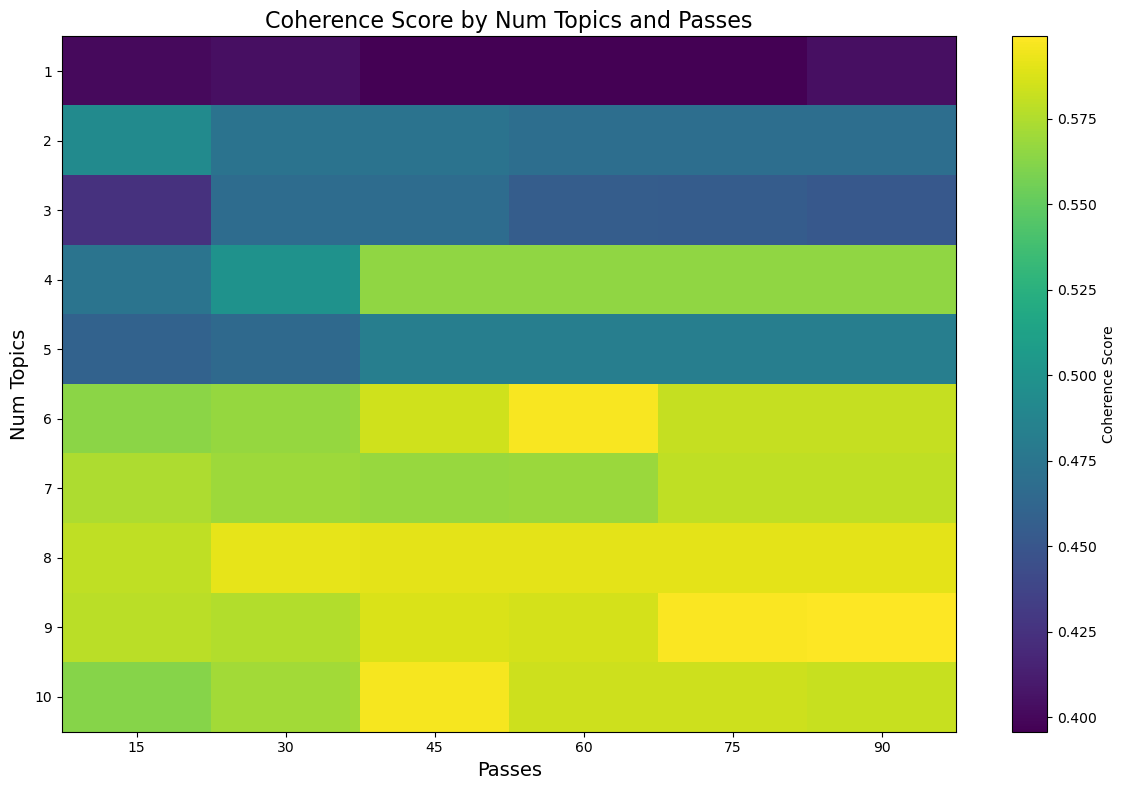

In [22]:
import matplotlib.pyplot as plt

# Visualisasi nilai koherensi dengan sumbu x dan y yang sesuai
pivot_table = results_df.pivot(index='num_topics', columns='passes', values='coherence')

# Membuat heatmap dengan label yang sesuai
plt.figure(figsize=(12, 8))
plt.title("Coherence Score by Num Topics and Passes", fontsize=16)
plt.xlabel("Passes", fontsize=14)
plt.ylabel("Num Topics", fontsize=14)

# Menentukan label sumbu x dan y dengan nilai yang sesuai
plt.xticks(ticks=range(len(pivot_table.columns)), labels=pivot_table.columns)
plt.yticks(ticks=range(len(pivot_table.index)), labels=pivot_table.index)

# Menampilkan heatmap
plt.imshow(pivot_table, cmap='viridis', aspect='auto')
plt.colorbar(label='Coherence Score')
plt.tight_layout()
plt.show()


In [26]:
# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'].progress_apply(lambda x: x))
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=9, id2word=dictionary, passes=90)

# Tampilkan topik-topik
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

100%|██████████| 234/234 [00:00<00:00, 91923.49it/s]


Topic: 0 
Words: 0.080*"universitas" + 0.064*"bagus" + 0.032*"parkir" + 0.032*"rekomendasi" + 0.032*"luas" + 0.032*"cari" + 0.032*"negeri" + 0.017*"anak" + 0.017*"wifi" + 0.017*"ramah"
Topic: 1 
Words: 0.103*"telkom" + 0.073*"surabaya" + 0.050*"kampus" + 0.046*"university" + 0.046*"bersih" + 0.031*"selamat" + 0.031*"sukses" + 0.031*"luas" + 0.023*"ajar" + 0.016*"daerah"
Topic: 2 
Words: 0.105*"kampus" + 0.042*"banget" + 0.036*"teknologi" + 0.036*"keren" + 0.030*"bas" + 0.024*"jurus" + 0.024*"informasi" + 0.024*"logistik" + 0.024*"transportasi" + 0.024*"maritim"
Topic: 3 
Words: 0.248*"bagus" + 0.031*"ketintang" + 0.031*"bakso" + 0.031*"sekolah" + 0.031*"hehe" + 0.018*"kampus" + 0.016*"telkom" + 0.016*"ramai" + 0.016*"lihat" + 0.016*"masjid"
Topic: 4 
Words: 0.065*"swasta" + 0.041*"layan" + 0.033*"salah" + 0.033*"guru" + 0.018*"kampus" + 0.017*"anak" + 0.017*"studi" + 0.017*"bidang" + 0.017*"jatim" + 0.017*"top"
Topic: 5 
Words: 0.079*"aman" + 0.053*"buruk" + 0.036*"bagus" + 0.036*"bant

In [29]:
import os
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel

# Pastikan semua elemen dalam kolom 'stemmed_tokens4' adalah list
df_total_all_new['stemmed_tokens4'] = df_total_all_new['stemmed_tokens4'].apply(lambda x: x if isinstance(x, list) else [])

# Langkah 7: Buat dictionary dan corpus untuk LDA
dictionary = corpora.Dictionary(df_total_all_new['stemmed_tokens4'])
corpus = [dictionary.doc2bow(tokens) for tokens in df_total_all_new['stemmed_tokens4']]

# Langkah 8: Latih model LDA
lda_model = LdaModel(corpus, num_topics=9, id2word=dictionary, passes=90)

# Mengambil topik-topik dan menyimpannya dalam format yang dapat diekspor
topics = []
for idx, topic in lda_model.print_topics(-1):
    words = topic.split(' + ')
    topic_dict = {'Topic': idx}
    for i, word in enumerate(words):
        weight, term = word.split('*"')
        term = term.replace('"', '')
        topic_dict[f'Word_{i+1}'] = f'{term} ({weight})'
    topics.append(topic_dict)

# Konversi ke DataFrame
df_topics = pd.DataFrame(topics)

# Simpan ke file Excel dengan sheet baru
file_path = 'Seluruh_Univ_lda_topics2.xlsx'
sheet_name = 'ITTS_Univ_lda_topics'  # Nama sheet baru yang diinginkan

# Cek apakah file sudah ada
file_exists = os.path.exists(file_path)

if file_exists:
    # Jika file sudah ada, gunakan mode append dengan if_sheet_exists="replace"
    with pd.ExcelWriter(file_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
        df_topics.to_excel(writer, sheet_name=sheet_name, index=False)
else:
    # Jika file belum ada, buat file baru tanpa if_sheet_exists
    with pd.ExcelWriter(file_path, mode="w", engine="openpyxl") as writer:
        df_topics.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Topik telah disimpan dalam sheet '{sheet_name}' pada file '{file_path}'")


Topik telah disimpan dalam sheet 'ITTS_Univ_lda_topics' pada file 'Seluruh_Univ_lda_topics2.xlsx'
